In [19]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Create Melt_Calendar

In [20]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/MLF Files/sales1_Melt.csv')

In [21]:
calendar = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/MLF Files/calendar.csv')

In [22]:
df = df[df['state_id'] == 'CA']

In [ ]:
df.shape
#df.head()

(8011644, 6)

In [ ]:
calendar.shape
#calendar.head()

(1969, 14)

In [23]:
df2 = df.merge(calendar, left_on = 'day', right_on = 'd', how = 'left')

In [24]:
df2['day'] = df2['day'].str.extract('(\d+)').astype(int)

In [25]:
columnorder = ['day', 'date','item_id', 'dept_id', 'store_id', 'wday', 'month', 'year', 'event_name_1','event_type_1', 'snap_CA', 'snap_TX','snap_WI', 'sales']
df2 = df2[columnorder]
df2.columns

Index(['day', 'date', 'item_id', 'dept_id', 'store_id', 'wday', 'month',
       'year', 'event_name_1', 'event_type_1', 'snap_CA', 'snap_TX', 'snap_WI',
       'sales'],
      dtype='object')

In [ ]:
df2.shape

(8011644, 14)

# EDA

In [ ]:
df2.head()

,day,date,item_id,dept_id,store_id,wday,month,year,event_name_1,event_type_1,snap_CA,snap_TX,snap_WI,sales
0,1,2011-01-29,HOUSEHOLD_1_001,HOUSEHOLD_1,CA_1,1,1,2011,NaN,NaN,0,0,0,3
1,1,2011-01-29,HOUSEHOLD_1_002,HOUSEHOLD_1,CA_1,1,1,2011,NaN,NaN,0,0,0,1
2,1,2011-01-29,HOUSEHOLD_1_003,HOUSEHOLD_1,CA_1,1,1,2011,NaN,NaN,0,0,0,0
3,1,2011-01-29,HOUSEHOLD_1_004,HOUSEHOLD_1,CA_1,1,1,2011,NaN,NaN,0,0,0,4
4,1,2011-01-29,HOUSEHOLD_1_005,HOUSEHOLD_1,CA_1,1,1,2011,NaN,NaN,0,0,0,0


In [ ]:
df2.dtypes

day              int64
date            object
item_id         object
dept_id         object
store_id        object
wday             int64
month            int64
year             int64
event_name_1    object
event_type_1    object
snap_CA          int64
snap_TX          int64
snap_WI          int64
sales            int64
dtype: object

In [ ]:
df2['date'] = pd.to_datetime(df2['date'])
df2['date'] = pd.to_datetime(df2['date'], format='%d-%m-%Y')

In [ ]:
df2.dtypes

day                      int64
date            datetime64[ns]
item_id                 object
dept_id                 object
store_id                object
wday                     int64
month                    int64
year                     int64
event_name_1            object
event_type_1            object
snap_CA                  int64
snap_TX                  int64
snap_WI                  int64
sales                    int64
dtype: object

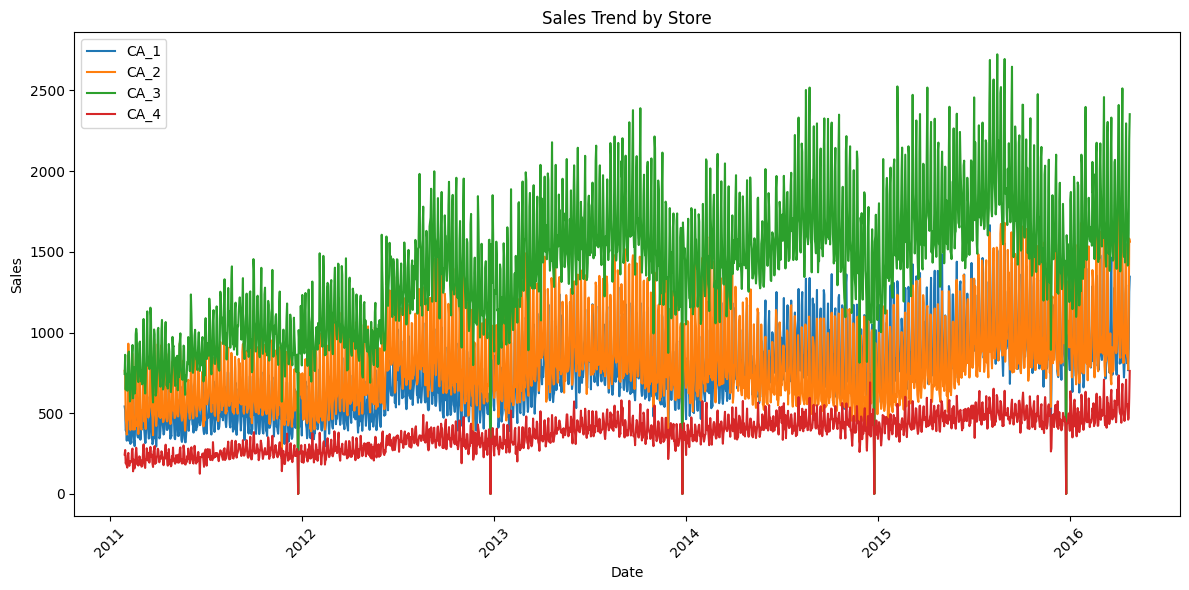

In [ ]:
# Group data by 'state' and 'date' and calculate sum of sales for each group
grouped = df2.groupby(['store_id', 'date'])['sales'].sum().reset_index()

# Now plot
plt.figure(figsize=(12, 6))  # Adjust the size as needed

# Loop through each state and plot its trend
for state in grouped['store_id'].unique():
    subset = grouped[grouped['store_id'] == state]
    plt.plot(subset['date'], subset['sales'], label=state)

plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Sales Trend by Store')
plt.legend()
plt.xticks(rotation=45)  # Rotate date labels for better readability
plt.tight_layout()  # Adjust layout to make room for the rotated date labels
plt.show()

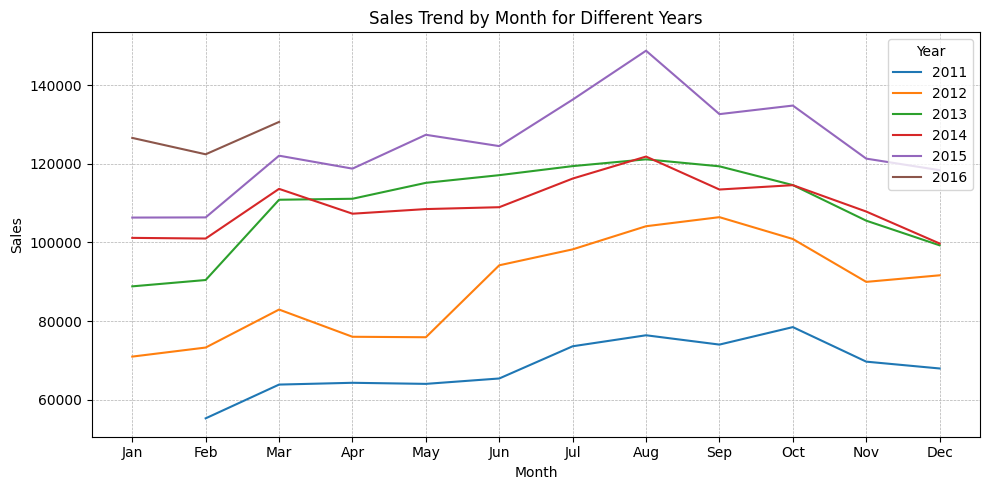

In [ ]:
# Group data by 'year' and 'month' and calculate sum of sales for each group
filtered_df = df2[~((df2['date'].dt.month == 1) & (df2['date'].dt.year == 2011))]
filtered_df2 = filtered_df[~((filtered_df['date'].dt.month == 4) & (filtered_df['date'].dt.year == 2016))]
grouped = filtered_df2.groupby(['year', 'month'])['sales'].sum().reset_index()

# Plot
plt.figure(figsize=(10, 5))  # Adjust the size as needed

# Get unique years
years = grouped['year'].unique()

for year in years:
    subset = grouped[grouped['year'] == year]
    # Ensure all 12 months are represented for each year
    subset = subset.set_index('month').reindex(range(1, 13)).reset_index()
    plt.plot(subset['month'], subset['sales'], label=year)

plt.xlabel('Month')
plt.ylabel('Sales')
plt.title('Sales Trend by Month for Different Years')
plt.legend(title='Year')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

# Improve plot aesthetics
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

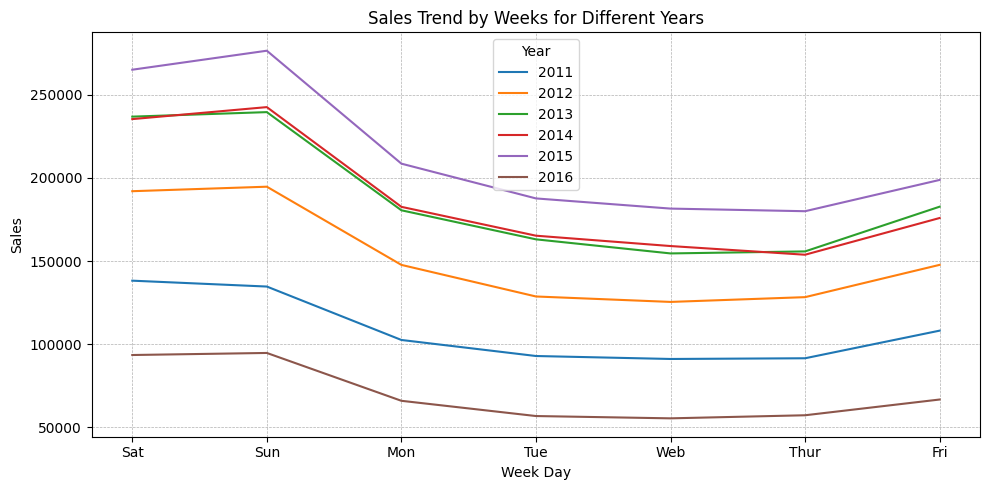

In [ ]:
grouped = df2.groupby(['year', 'wday'])['sales'].sum().reset_index()

# Plot
plt.figure(figsize=(10, 5))  # Adjust the size as needed

# Get unique years
years = grouped['year'].unique()

for year in years:
    subset = grouped[grouped['year'] == year]
    # Ensure all 12 months are represented for each year
    subset = subset.set_index('wday').reindex(range(1, 8)).reset_index()
    plt.plot(subset['wday'], subset['sales'], label=year)

plt.xlabel('Week Day')
plt.ylabel('Sales')
plt.title('Sales Trend by Weeks for Different Years')
plt.legend(title='Year')
plt.xticks(range(1, 8), ['Sat', 'Sun', 'Mon', 'Tue', 'Web', 'Thur', 'Fri'])

# Improve plot aesthetics
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

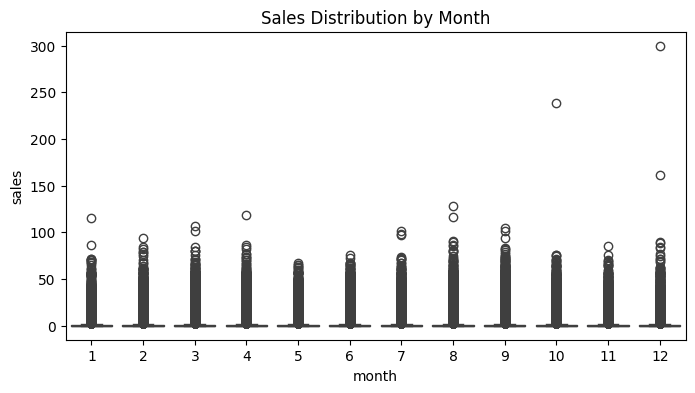

In [ ]:
fig, ax = plt.subplots(figsize = (8,4))
sns.boxplot(data=df2, x='month' , y='sales' )
ax.set_title('Sales Distribution by Month')
plt. show()

In [26]:
#Outlier Treatment

# Determine the 1st and 99th percentiles
lower_threshold = df2['sales'].quantile(0.01)
upper_threshold = df2['sales'].quantile(0.99)

# Apply capping
df2['capped_sales'] = df2['sales'].clip(lower=lower_threshold, upper=upper_threshold)

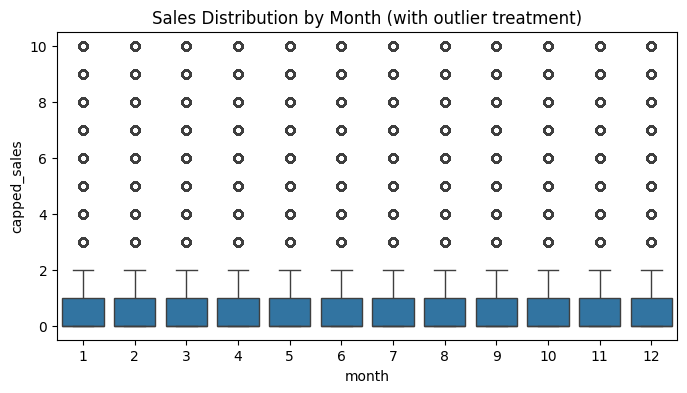

In [ ]:
fig, ax = plt.subplots(figsize = (8,4))
sns.boxplot(data=df2, x='month' , y='capped_sales' )
ax.set_title('Sales Distribution by Month (with outlier treatment)')
plt. show()

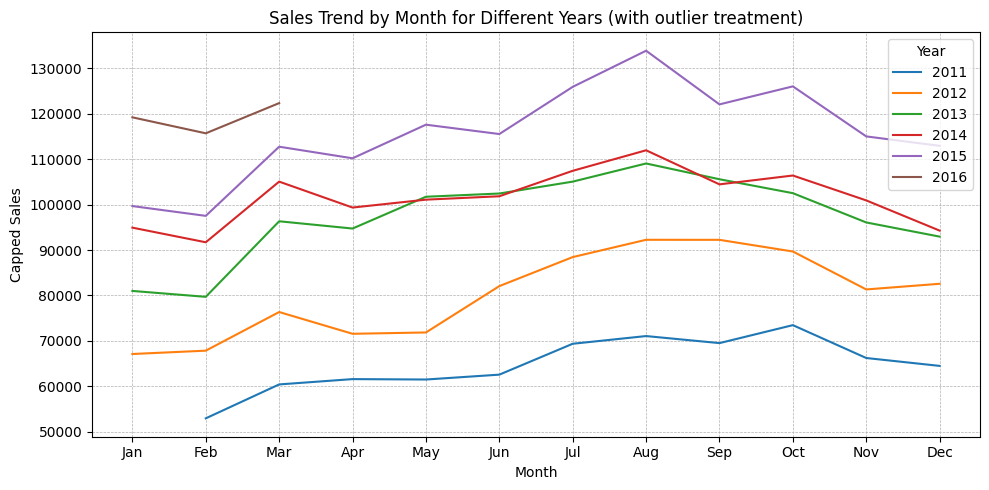

In [ ]:
# Group data by 'year' and 'month' and calculate sum of sales for each group
filtered_df = df2[~((df2['month']== 1) & (df2['year'] == 2011))]
filtered_df2 = filtered_df[~((filtered_df['month'] == 4) & (filtered_df['year'] == 2016))]
grouped = filtered_df2.groupby(['year', 'month'])['capped_sales'].sum().reset_index()

# Plot
plt.figure(figsize=(10, 5))  # Adjust the size as needed

# Get unique years
years = grouped['year'].unique()

for year in years:
    subset = grouped[grouped['year'] == year]
    # Ensure all 12 months are represented for each year
    subset = subset.set_index('month').reindex(range(1, 13)).reset_index()
    plt.plot(subset['month'], subset['capped_sales'], label=year)

plt.xlabel('Month')
plt.ylabel('Capped Sales')
plt.title('Sales Trend by Month for Different Years (with outlier treatment)')
plt.legend(title='Year')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

# Improve plot aesthetics
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

In [27]:
finalcol = ['day', 'item_id', 'dept_id', 'store_id', 'wday', 'month', 'year', 'event_name_1','event_type_1', 'snap_CA', 'capped_sales']
df3 = df2[finalcol]
df3.columns

Index(['day', 'item_id', 'dept_id', 'store_id', 'wday', 'month', 'year',
       'event_name_1', 'event_type_1', 'snap_CA', 'capped_sales'],
      dtype='object')

In [28]:
df3.replace({np.nan: '0'}, inplace=True)

<ipython-input-28-31e53b1ddf54>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3.replace({np.nan: '0'}, inplace=True)


In [29]:
df3.rename(columns={'capped_sales': 'sales'}, inplace=True)

<ipython-input-29-ae6fc5acdaab>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3.rename(columns={'capped_sales': 'sales'}, inplace=True)


In [30]:
df3.to_csv('/content/drive/MyDrive/Colab Notebooks/MLF Files/sales1CA2_Melt_Calendar_OutTreat.csv',index = False)

In [ ]:
df3.head()

,day,item_id,dept_id,store_id,wday,month,year,event_name_1,event_type_1,snap_CA,sales
0,1,HOUSEHOLD_1_001,HOUSEHOLD_1,CA_1,1,1,2011,0,0,0,3
1,1,HOUSEHOLD_1_002,HOUSEHOLD_1,CA_1,1,1,2011,0,0,0,1
2,1,HOUSEHOLD_1_003,HOUSEHOLD_1,CA_1,1,1,2011,0,0,0,0
3,1,HOUSEHOLD_1_004,HOUSEHOLD_1,CA_1,1,1,2011,0,0,0,4
4,1,HOUSEHOLD_1_005,HOUSEHOLD_1,CA_1,1,1,2011,0,0,0,0


In [ ]:
# Step 2: Encoding Categorical Variables
from sklearn.preprocessing import LabelEncoder
le_item_id = LabelEncoder()
le_dept_id = LabelEncoder()
le_store_id = LabelEncoder()
le_event_name_1 = LabelEncoder()
le_event_type_1 = LabelEncoder()

df3['item_id_enc'] = le_item_id.fit_transform(df3['item_id'])
df3['dept_id_enc'] = le_dept_id.fit_transform(df3['dept_id'])
df3['store_id_enc'] = le_store_id.fit_transform(df3['store_id'])
df3['event_name_1_enc'] = le_event_name_1.fit_transform(df3['event_name_1'])
df3['event_type_1_enc'] = le_event_type_1.fit_transform(df3['event_type_1'])

<ipython-input-15-51fb4ba46d3f>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['item_id_enc'] = le_item_id.fit_transform(df3['item_id'])
<ipython-input-15-51fb4ba46d3f>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['dept_id_enc'] = le_dept_id.fit_transform(df3['dept_id'])
<ipython-input-15-51fb4ba46d3f>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: ht

In [ ]:
finalcol = ['day', 'wday', 'month', 'year', 'item_id_enc', 'dept_id_enc', 'store_id_enc', 'event_name_1_enc', 'event_type_1_enc', 'event_name_1_enc', 'snap_CA', 'sales']
df3 = df3[finalcol]
df3.columns

Index(['day', 'wday', 'month', 'year', 'item_id_enc', 'dept_id_enc',
       'store_id_enc', 'event_name_1_enc', 'event_type_1_enc',
       'event_name_1_enc', 'snap_CA', 'sales'],
      dtype='object')

In [ ]:
df3.head()

,day,wday,month,year,item_id_enc,dept_id_enc,store_id_enc,event_name_1_enc,event_type_1_enc,event_name_1_enc,snap_CA,sales
0,1,1,1,2011,0,0,0,0,0,0,0,3
1,1,1,1,2011,1,0,0,0,0,0,0,1
2,1,1,1,2011,2,0,0,0,0,0,0,0
3,1,1,1,2011,3,0,0,0,0,0,0,4
4,1,1,1,2011,4,0,0,0,0,0,0,0


In [ ]:
df3.to_csv('/content/drive/MyDrive/Colab Notebooks/MLF Files/sales1CA2_Melt_Calendar_OutTreat_LabelEnc.csv',index = False)